- Edison Camilo Huérfano Villalba

3. Modify the PancakesTrees.ipynb code to plot the pancakes trees using two spatulas.

In [1]:
import pydot
from collections import defaultdict 
from IPython.display import Image, display

In [2]:
def lstr(p):
        return ''.join([str(elem)  for elem in p])

In [3]:
def ModifiedBFS_Item3(n): 

        # Default source node
        s=[]
        for i in range(n):
          s.append(i+1)

        # Create dictionaries graph,visited,connections and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        connections = defaultdict(int)
        G = pydot.Dot(graph_type="graph", strict=True)
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[lstr(s)] = True
        flag = True
        edges=0

        while queue: 
  
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            graph[lstr(s)]=[]
            if (s == sorted(s)):
              node = pydot.Node(lstr(s),style="filled", fillcolor="green") # first sorted green
            G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it
            for i in range(len(s)-1):
              for j in range(i+1):
                if (j==0):
                  d = s[i+1::-1] + s[i+2:]
                  # print("i,j:"+str(i+1)+" "+str(j))
                  # print(s[i+1::-1])
                  # print(s[i+2:])
                else:
                  d = s[:j] + s[i+1:j-1:-1] + s[i+2:]
                if (d != s) and (connections[lstr(d)]<=len(s)*(len(s)-1)):
                  
                  node = pydot.Node(lstr(d))
                  
                  G.add_node(node)
                  edge = pydot.Edge(lstr(d),lstr(s))
                  G.add_edge(edge)
                  edge = pydot.Edge(lstr(s),lstr(d))
                  G.add_edge(edge)
                  edges=edges+2
                  graph[lstr(s)].append(lstr(d))
                  queue.append(d) 
                  visited[lstr(d)] = True 
                  connections[lstr(s)] = connections[lstr(s)]+1
                  connections[lstr(d)] = connections[lstr(d)]+1
              
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

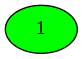

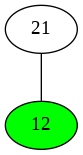

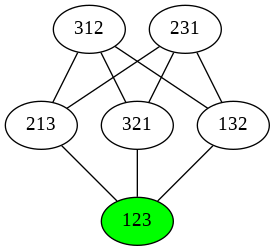

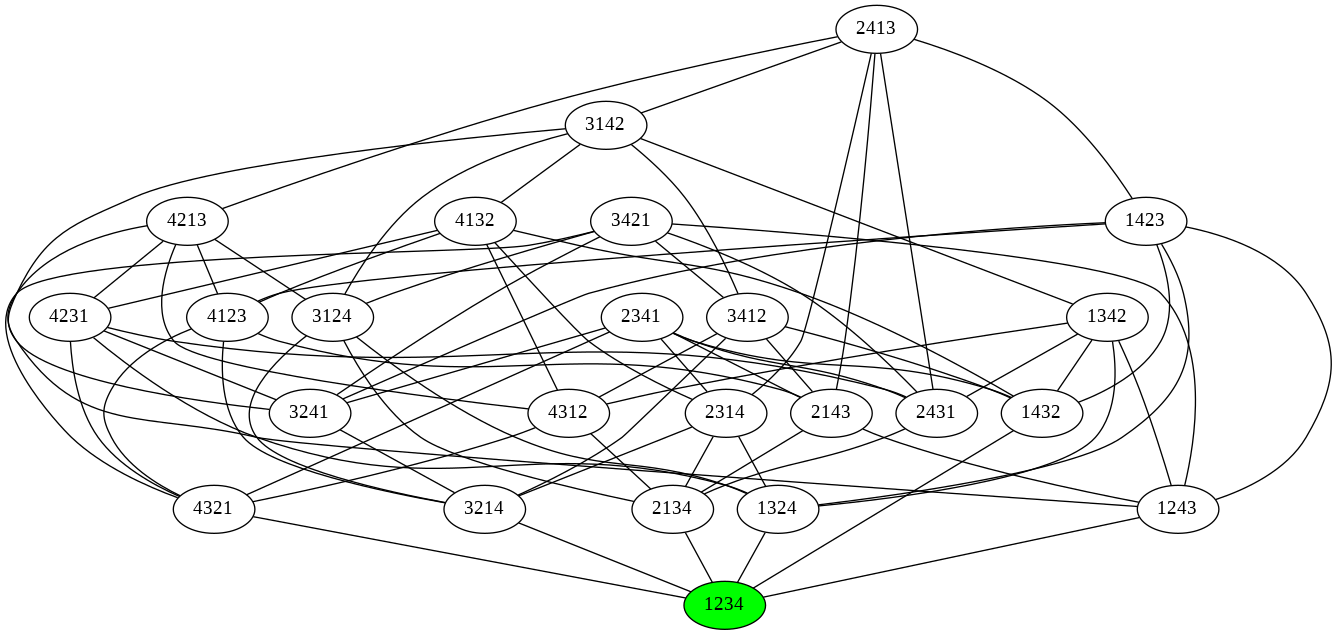

In [4]:
# Pancake Network and Pn for n = 1,2,3,4
for n in range(4):
  ModifiedBFS_Item3(n+1)